In [37]:
import pandas as pd
from neuralprophet import NeuralProphet, set_log_level
import plotly.express as px
set_log_level("ERROR")

In [38]:
##참고
#https://bigwaveai.tistory.com/28
## 코로나 거리두기, 신규확진자, 신규 이용자, 공기 관련 데이터 제거


In [39]:
data=pd.read_csv("../../data/scaled_data/data_scaled_rb_with_date.csv", header=0).fillna(method='ffill').fillna(method='bfill')

In [40]:
data.head()

,date,air_GW,real_pop_GW,pop_GW,pop_male_GW,pop_female_GW,mvpop_GW,station_GW,air_DDM,real_pop_DDM,...,rain(mm),relative_humidity,distance_stage,distance_total,distance_value,distance_nominal,GW_demand,DDM_demand,SD_demand,JL_demand
0,1/1/2018,0.36,0.832483,0.773941,-0.892289,0.794929,-0.701285,-0.518519,0.625000,0.193881,...,0.0,-1.009217,0.0,0.0,0.0,0.0,-0.831933,-0.777027,-0.849244,-0.734903
1,1/2/2018,0.40,0.382191,0.773941,-0.892289,0.794929,0.464299,-0.518519,0.500000,0.620841,...,0.0,-0.875576,0.0,0.0,0.0,0.0,-0.791855,-0.717664,-0.758950,-0.705314
2,1/3/2018,0.04,0.317785,0.773941,-0.892289,0.794929,0.504179,-0.518519,0.250000,0.682977,...,0.0,-0.861751,0.0,0.0,0.0,0.0,-0.793794,-0.726834,-0.775259,-0.696860
3,1/4/2018,0.44,0.420246,0.773941,-0.892289,0.794929,0.518573,-0.518519,0.708333,0.744058,...,0.0,-0.829493,0.0,0.0,0.0,0.0,-0.799612,-0.735039,-0.782816,-0.695652
4,1/5/2018,1.24,0.407412,0.773941,-0.892289,0.794929,0.730029,-0.518519,1.416667,0.632762,...,0.0,-0.580645,0.0,0.0,0.0,0.0,-0.795410,-0.720560,-0.766905,-0.690821


In [41]:
data.columns

Index(['date', 'air_GW', 'real_pop_GW', 'pop_GW', 'pop_male_GW',
       'pop_female_GW', 'mvpop_GW', 'station_GW', 'air_DDM', 'real_pop_DDM',
       'pop_DDM', 'pop_male_DDM', 'pop_female_DDM', 'mvpop_DDM', 'station_DDM',
       'air_SD', 'real_pop_SD', 'pop_SD', 'pop_male_SD', 'pop_female_SD',
       'mvpop_SD', 'station_SD', 'air_JL', 'real_pop_JL', 'pop_JL',
       'pop_male_JL', 'pop_female_JL', 'mvpop_JL', 'station_JL',
       'keyword_diet', 'keyword_exercise', 'keyword_healthypleasure',
       'keyword_environment', 'keyword_green', 'keyword_dust', 'keyword_',
       'temp_avg', 'temp_low', 'temp_high', 'rain(mm)', 'relative_humidity',
       'distance_stage', 'distance_total', 'distance_value',
       'distance_nominal', 'GW_demand', 'DDM_demand', 'SD_demand',
       'JL_demand'],
      dtype='object')

In [42]:
data.dtypes

date                        object
air_GW                     float64
real_pop_GW                float64
pop_GW                     float64
pop_male_GW                float64
pop_female_GW              float64
mvpop_GW                   float64
station_GW                 float64
air_DDM                    float64
real_pop_DDM               float64
pop_DDM                    float64
pop_male_DDM               float64
pop_female_DDM             float64
mvpop_DDM                  float64
station_DDM                float64
air_SD                     float64
real_pop_SD                float64
pop_SD                     float64
pop_male_SD                float64
pop_female_SD              float64
mvpop_SD                   float64
station_SD                 float64
air_JL                     float64
real_pop_JL                float64
pop_JL                     float64
pop_male_JL                float64
pop_female_JL              float64
mvpop_JL                   float64
station_JL          

In [43]:
data['date']=pd.to_datetime(data.date)

In [25]:
data.dtypes

Unnamed: 0                          int64
date                       datetime64[ns]
air_GW                            float64
real_pop_GW                       float64
pop_GW                            float64
pop_male_GW                       float64
pop_female_GW                     float64
mvpop_GW                          float64
station_GW                        float64
air_DDM                           float64
real_pop_DDM                      float64
pop_DDM                           float64
pop_male_DDM                      float64
pop_female_DDM                    float64
mvpop_DDM                         float64
station_DDM                       float64
air_SD                            float64
real_pop_SD                       float64
pop_SD                            float64
pop_male_SD                       float64
pop_female_SD                     float64
mvpop_SD                          float64
station_SD                        float64
air_JL                            

In [44]:
data=data.rename(columns={"date":"ds", "GW_demand":"y"})

In [45]:
col_lst=['air_GW', 'real_pop_GW', 'pop_GW', 'pop_male_GW',
       'pop_female_GW', 'mvpop_GW', 'station_GW', 'air_DDM', 'real_pop_DDM',
       'pop_DDM', 'pop_male_DDM', 'pop_female_DDM', 'mvpop_DDM', 'station_DDM',
       'air_SD', 'real_pop_SD', 'pop_SD', 'pop_male_SD', 'pop_female_SD',
       'mvpop_SD', 'station_SD', 'air_JL', 'real_pop_JL', 'pop_JL',
       'pop_male_JL', 'pop_female_JL', 'mvpop_JL', 'station_JL',
       'keyword_diet', 'keyword_exercise', 'keyword_healthypleasure',
       'keyword_environment', 'keyword_green', 'keyword_dust', 'keyword_',
       'temp_avg', 'temp_low', 'temp_high', 'rain(mm)', 'relative_humidity',
       'distance_stage', 'distance_total', 'distance_value',
       'distance_nominal', 'DDM_demand', 'SD_demand',
       'JL_demand']
#y변수 정의
y_col_lst=['y']

In [46]:
cutoff = "1/1/2021" #데이터 분할 기준
train = data[data['ds']<cutoff]
test = data[data['ds']>=cutoff]

In [47]:
test.head()

,ds,air_GW,real_pop_GW,pop_GW,pop_male_GW,pop_female_GW,mvpop_GW,station_GW,air_DDM,real_pop_DDM,...,rain(mm),relative_humidity,distance_stage,distance_total,distance_value,distance_nominal,y,DDM_demand,SD_demand,JL_demand
1096,2021-01-01,-0.32,-0.590671,-0.61659,0.704229,-0.59657,-1.728469,1.0,-0.333333,-0.903833,...,0.0,0.138249,1.25,1.0,1.25,1.333333,-0.593083,-0.467664,-0.631265,-0.414855
1097,2021-01-02,-0.16,-0.543342,-0.61659,0.704229,-0.59657,-1.366964,1.0,-0.166667,-0.861239,...,0.0,-1.036866,1.25,1.0,1.25,1.333333,-0.594376,-0.405888,-0.602228,-0.349034
1098,2021-01-03,0.08,-0.271586,-0.61659,0.704229,-0.59657,-1.544642,1.0,-0.041667,-0.649211,...,0.0,-0.737327,1.25,1.0,1.25,1.333333,-0.617647,-0.418436,-0.604614,-0.397947
1099,2021-01-04,0.04,-0.638856,-0.61659,0.704229,-0.59657,-0.570305,1.0,0.083333,-0.512752,...,0.0,-0.442396,1.25,1.0,1.25,1.333333,-0.404331,-0.210425,-0.381066,-0.267512
1100,2021-01-05,-0.40,-0.628863,-0.61659,0.704229,-0.59657,-0.543921,1.0,-0.166667,-0.518977,...,0.0,-0.377880,1.25,1.0,1.25,1.333333,-0.464771,-0.293436,-0.462212,-0.321860


In [48]:
train.head()

,ds,air_GW,real_pop_GW,pop_GW,pop_male_GW,pop_female_GW,mvpop_GW,station_GW,air_DDM,real_pop_DDM,...,rain(mm),relative_humidity,distance_stage,distance_total,distance_value,distance_nominal,y,DDM_demand,SD_demand,JL_demand
0,2018-01-01,0.36,0.832483,0.773941,-0.892289,0.794929,-0.701285,-0.518519,0.625000,0.193881,...,0.0,-1.009217,0.0,0.0,0.0,0.0,-0.831933,-0.777027,-0.849244,-0.734903
1,2018-01-02,0.40,0.382191,0.773941,-0.892289,0.794929,0.464299,-0.518519,0.500000,0.620841,...,0.0,-0.875576,0.0,0.0,0.0,0.0,-0.791855,-0.717664,-0.758950,-0.705314
2,2018-01-03,0.04,0.317785,0.773941,-0.892289,0.794929,0.504179,-0.518519,0.250000,0.682977,...,0.0,-0.861751,0.0,0.0,0.0,0.0,-0.793794,-0.726834,-0.775259,-0.696860
3,2018-01-04,0.44,0.420246,0.773941,-0.892289,0.794929,0.518573,-0.518519,0.708333,0.744058,...,0.0,-0.829493,0.0,0.0,0.0,0.0,-0.799612,-0.735039,-0.782816,-0.695652
4,2018-01-05,1.24,0.407412,0.773941,-0.892289,0.794929,0.730029,-0.518519,1.416667,0.632762,...,0.0,-0.580645,0.0,0.0,0.0,0.0,-0.795410,-0.720560,-0.766905,-0.690821


In [65]:
data.isnull().any()

ds                         False
air_GW                     False
real_pop_GW                False
pop_GW                     False
pop_male_GW                False
pop_female_GW              False
mvpop_GW                   False
station_GW                 False
air_DDM                    False
real_pop_DDM               False
pop_DDM                    False
pop_male_DDM               False
pop_female_DDM             False
mvpop_DDM                  False
station_DDM                False
air_SD                     False
real_pop_SD                False
pop_SD                     False
pop_male_SD                False
pop_female_SD              False
mvpop_SD                   False
station_SD                 False
air_JL                     False
real_pop_JL                False
pop_JL                     False
pop_male_JL                False
pop_female_JL              False
mvpop_JL                   False
station_JL                 False
keyword_diet               False
keyword_ex

In [67]:
m = NeuralProphet(

growth='off', # 추세 유형 설정(linear, discontinuous, off 중 선택 가능)

yearly_seasonality=True, #년간 계절성 설정

weekly_seasonality=True, #주간 계절성 설정

daily_seasonality=True, #일간 계절성 설정

optimizer= 'AdamW',
    
batch_size=128,#배치 사이즈 설정

epochs=None,#학습 횟수 설정

learning_rate=None, # 학습률 설정

    


)

#독립 변인(변수) 추가 및 정규화
m = m.add_lagged_regressor(names=col_lst, normalize="minmax") 
m.add_seasonality(name='monthly', period=30.5, fourier_order=5)

#학습 수행
metrics = m.fit(train, freq='h', validation_df=test)

Finding best initial lr:   0%|          | 0/226 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

WARNING - (py.warnings._showwarnmsg) - C:\Users\LYH\AppData\Local\Programs\Python\Python310\lib\site-packages\pytorch_lightning\trainer\trainer.py:653: UserWarning: Detected KeyboardInterrupt, attempting graceful shutdown...
  rank_zero_warn("Detected KeyboardInterrupt, attempting graceful shutdown...")



In [50]:
metrics.tail(3)

,MAE_val,RMSE_val,Loss_val,RegLoss_val,epoch,MAE,RMSE,Loss,RegLoss
27,NaN,NaN,NaN,0.0,27,NaN,NaN,NaN,0.0
28,NaN,NaN,NaN,0.0,28,NaN,NaN,NaN,0.0
29,NaN,NaN,NaN,0.0,29,NaN,NaN,NaN,0.0


Predicting: 35it [00:00, ?it/s]

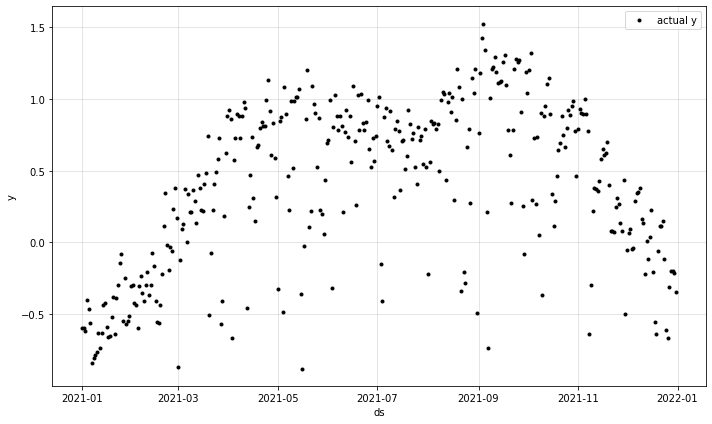

In [51]:
#yhat1과 실제값 시각화(lag 데이터 포함x)
forecast = m.predict(test)
fig = m.plot(forecast[['ds', 'y', 'yhat1']])

In [ ]:
#학습 선 그래프 생성
px.line(metrics, y=['MAE', 'MAE_val'], width=800, height=400)

In [ ]:
##준영님이 주신 make future dataframe 코드입니다
future = m.make_future_dataframe(data, periods = 365)
#yhat1과 실제값 시각화(lag 데이터 포함x)
forecast = m.predict(test)
fig = m.plot(forecast[['ds', 'y', 'yhat1']])

In [ ]:
#학습 데이터셋 예측 결과 시각화
train_pred = m.predict(train)
#fig = m.plot(train_pred)
fig1 = m.plot(train_pred)
fig2 = m.plot(train_pred)
#comp = m.plot_components(train_pred)
param = m.plot_parameters()

In [ ]:
#yhat1과 실제값 시각화(lag 데이터 포함O)
forecast = m.predict(test)
m = m.highlight_nth_step_ahead_of_each_forecast(1)
fig = m.plot(forecast)